## Задача: Собрать датасет, проанализировать рынок конкретной отрасли, посчитать метрику и сделать вывод.
Отрасль будет 41.20 Строительство жилых и нежилых зданий. Данные сначала возьму из [ФНС](https://api-fns.ru/api/search), где через API узнаю ИНН, ОГНР и прочую информацию. Затем на этом [сайте](https://bo.nalog.ru/) спаршу финансовую информацию и начну анализировать. В анализе также буду использовать geopandas и нанесу топ500 компаний по выручке на карту. Ну и чтобы потренить GitGub буду коммитить в ходе выполнения работы.

Начнем c ознакомлением API от ФНС. На данном [сайте](https://api-fns.ru/api_help#collapse2) инструкция по обращению к БД. Зарегался, получил свой токен и начинаю делать запросы. Меня интересуют юридические лица, среднее и малые предприятия, в видах деятельности указывайте 41.20 Строительство жилых и нежилых зданий.

Чтобы токен мой не видно было закину в файл .env, а потом в .gitignore. Внизу проверка работы 

In [ ]:
from dotenv import load_dotenv
import os

# Загрузка переменных окружения
load_dotenv()

# Получение токена
api_token = os.getenv("API_TOKEN")

print(f"Токен: {api_token}")

Токен: чееек


## Глава 1. API

Для запросов будем использовать request 

In [1]:
import requests # импортируем

In [12]:
response = requests.get('https://www.google.com/')
print(response) # проверяем отклик
print(response.content) # чекнем контент

<Response [200]>
b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ru"><head><meta content="&#1055;&#1086;&#1080;&#1089;&#1082; &#1080;&#1085;&#1092;&#1086;&#1088;&#1084;&#1072;&#1094;&#1080;&#1080; &#1074; &#1080;&#1085;&#1090;&#1077;&#1088;&#1085;&#1077;&#1090;&#1077;: &#1074;&#1077;&#1073; &#1089;&#1090;&#1088;&#1072;&#1085;&#1080;&#1094;&#1099;, &#1082;&#1072;&#1088;&#1090;&#1080;&#1085;&#1082;&#1080;, &#1074;&#1080;&#1076;&#1077;&#1086; &#1080; &#1084;&#1085;&#1086;&#1075;&#1086;&#1077; &#1076;&#1088;&#1091;&#1075;&#1086;&#1077;." name="description"><meta content="noodp, " name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="7l51hkQjxHuaSms0kvXzXg">(function(){var _g={kEI:\'gOTOZ-_8GLWJ9u8Pr5rC6AE\',kEXPI:\'0,202792,3497507,650,435,538661,2872,2891,43028,30022,16105,78219,266577,226411,20908,42725

По документации видно, что есть 4 параметра и меня в основном интересует словарь filter



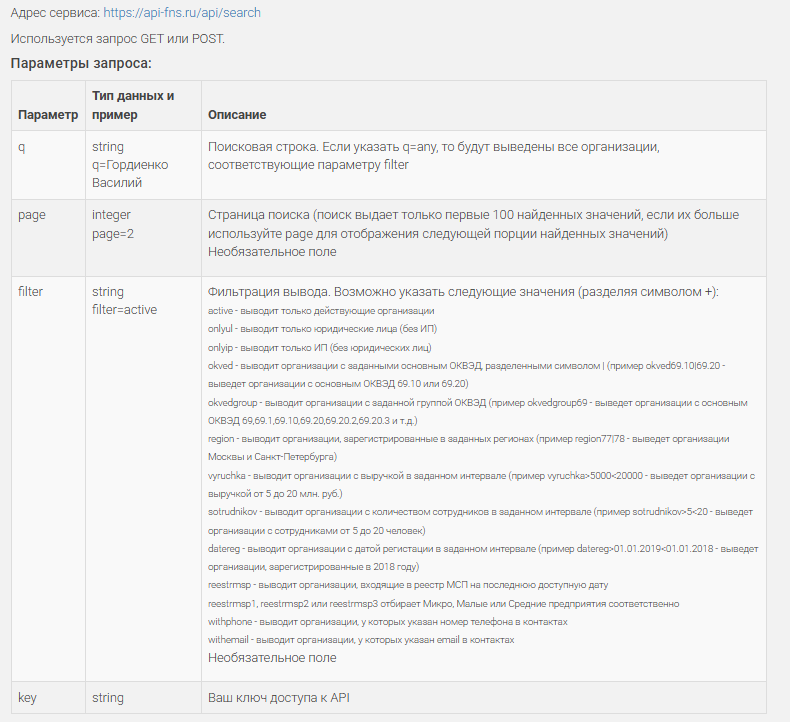
